## Observations and Insights 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "Resources/metadata.csv"
study_results_path = "Resources/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

merged_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [70]:
# Checking the number of mice.
# calc mice count by getting length of the unique IDs
mice_count = len(merged_data["Mouse ID"].unique())
mice_count

249

In [71]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset =["Mouse ID", "Timepoint",]), "Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [72]:
# Optional: Get all the data for the duplicate mouse ID. 
# find and grab duplicated mice
duplicate_mice_id = merged_data[merged_data["Mouse ID"].isin(duplicate_mice)==False]
duplicate_mice_id




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data[merged_data["Mouse ID"].isin(duplicate_mice)==False]

In [74]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].value_counts()
clean_mice_count = len(clean_mice)
clean_mice_count


248

## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#mean
reg_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
reg_mean

#median
reg_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
reg_median

#variance
reg_var = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
reg_var

#std deviation
reg_std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
reg_std

#sem
reg_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
reg_sem



# Assemble the resulting series into a single summary dataframe.
reg_df = pd.DataFrame({"Mean": reg_mean, 
                       "Median": reg_median,
                       "Variance": reg_var,
                       "Standard Deviation": reg_std,
                       "SEM": reg_sem})
reg_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

#first group by drug regimen
grouped_reg = clean_df.groupby("Drug Regimen")

#then use .agg to find and create stats
summary_stats = grouped_reg.agg(["mean","median", "var", "std", "sem"])["Tumor Volume (mm3)"]

#print out
summary_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

(0.0, 275.0)

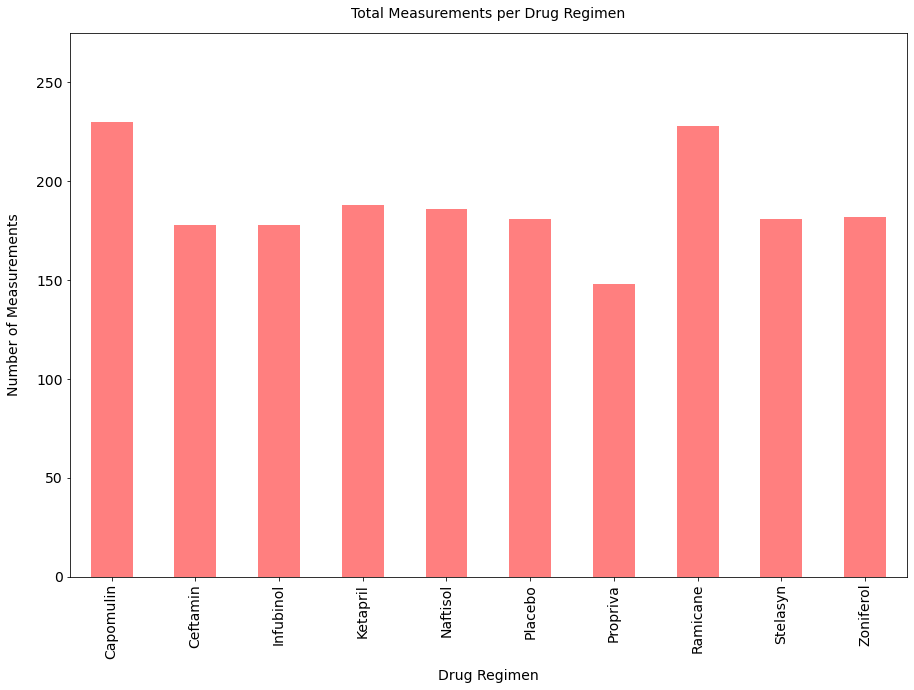

In [77]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#use .count to find how many times each drug was used
measurement_per_reg = grouped_reg["Drug Regimen"].count()
measurement_per_reg

#plot out bar plot
drug_reg_measurement_bar = measurement_per_reg.plot.bar(color="r", fontsize = 14, align= "center",
                                                        alpha =0.5, figsize =(15,10))

#labels and formatting
plt.xlabel("Drug Regimen", fontsize = 14, labelpad=10)
plt.ylabel("Number of Measurements", fontsize = 14, labelpad=15)
plt.title("Total Measurements per Drug Regimen", fontsize = 14, pad=15)
plt.ylim(0, 275)


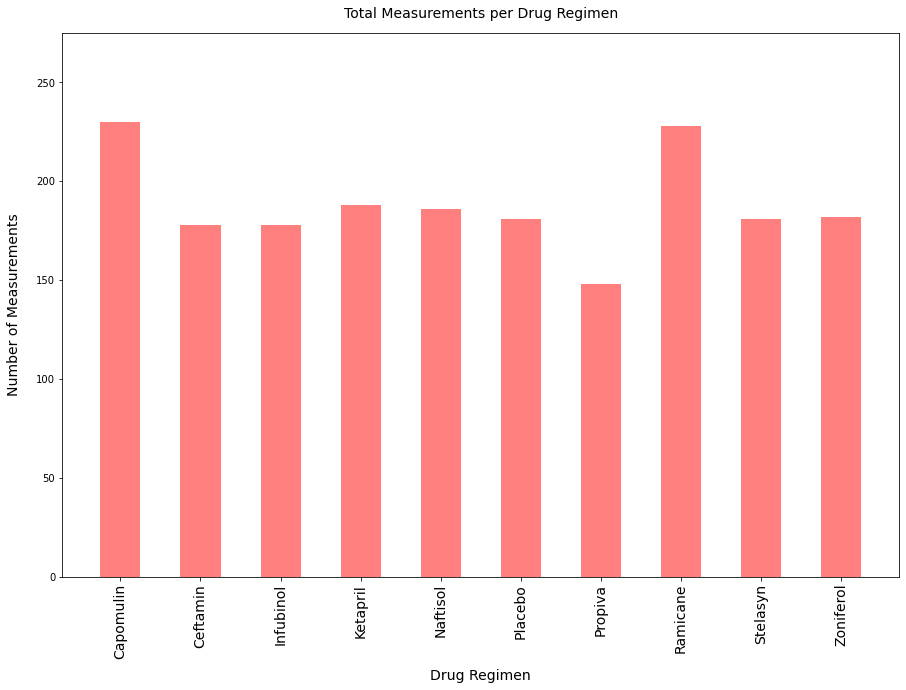

In [78]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#c&p from above
measurement_per_reg = grouped_reg["Drug Regimen"].count()
measurement_per_reg

#make DF out of results
measurements_df = pd.DataFrame(measurement_per_reg)
measurements_df

#change column name so data can be organized
measurements_df.rename(columns={"Drug Regimen": "No. of Measurements"}, inplace = True)

measurements_df

#store data from no. of measurements column in variable for Y-axis
no_of_measurements = measurements_df["No. of Measurements"].tolist()

#define x-axis and plt.bar
x_axis = np.arange(len(no_of_measurements))

plt.bar(x_axis, no_of_measurements, color="r", alpha=0.5, align="center", width = 0.5)

#tick locations and plt tick
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", 
                            "Ceftamin", 
                            "Infubinol", 
                            "Ketapril", 
                            "Naftisol", 
                            "Placebo", 
                            "Propiva", 
                            "Ramicane", 
                            "Stelasyn", 
                            "Zoniferol"], rotation=90,fontsize = 14)

#c&p same formatting as before
#labels and formatting
plt.xlabel("Drug Regimen", fontsize = 14, labelpad= 10)
plt.ylabel("Number of Measurements", fontsize = 14, labelpad= 15)
plt.title("Total Measurements per Drug Regimen", fontsize = 14, pad = 15)
plt.ylim(0, 275)
#have to use get current figure to make fig larger with pyplots
fig = plt.gcf()
fig.set_size_inches(15,10)

,No. of Mice,Percentage
Sex,,
Female,123,49.596774
Male,125,50.403226


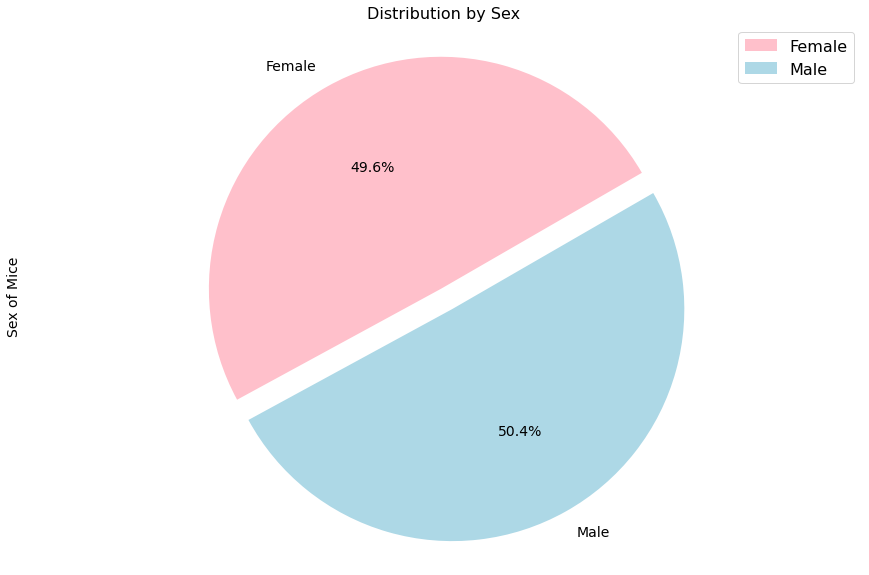

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#group gender and then find unique IDs to eliminate repeated ID #s
grouped_gender = clean_df.groupby("Sex")

unique_gender = grouped_gender["Mouse ID"].nunique()

#create df so it can be used to plot
unique_gender_df = pd.DataFrame(unique_gender)


#rename Mouse ID to No. of Mice
unique_gender_df.rename(columns={"Mouse ID": "No. of Mice"}, inplace = True)
unique_gender_df

#create column called percentage so that we can use that data to plot pie chart
unique_gender_df["Percentage"] = 100*(unique_gender_df["No. of Mice"]/unique_gender_df["No. of Mice"].sum())


#format so it is in percentage
#unique_gender_df["Percentage"] = unique_gender_df["Percentage"].map("{:.1f}%".format)
unique_gender_df


#plot out using pandas...whoops forgot that pandas automatically finds percentage...lol
colors = ["pink", "lightblue"]
explode = (0.1, 0)
gender_pie_chart = unique_gender_df.plot.pie(y= "No. of Mice", colors=colors, startangle = 30,
                                             figsize=(15,10), explode = explode, autopct="%1.1f%%", 
                                             textprops=dict(fontsize=14))
#format pie chart
plt.title("Distribution by Sex", fontsize=16)
plt.ylabel("Sex of Mice", fontsize=14)
plt.axis("equal")
plt.legend(fontsize = 16)


unique_gender_df

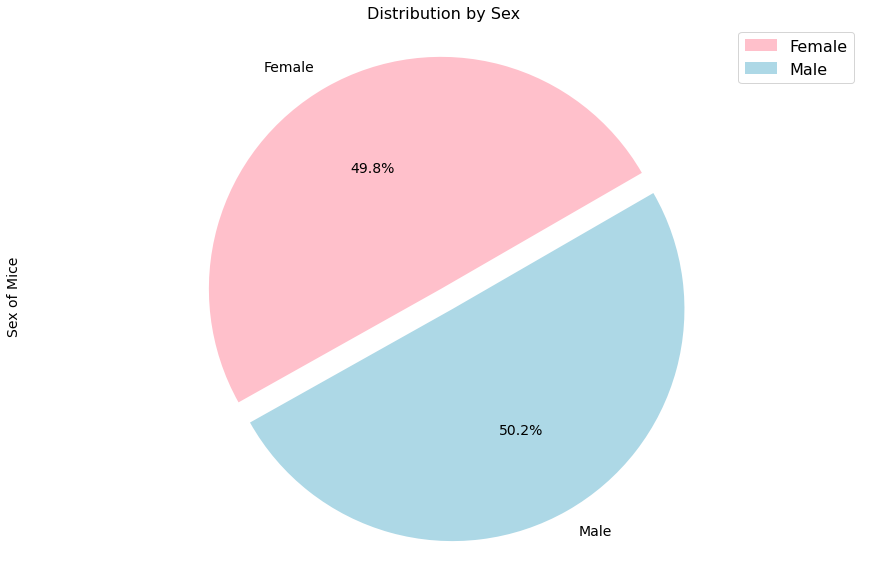

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#use same labels and colors but add it using pyplot
labels = ["Female", "Male"]
colors = ["pink", "lightblue"]

#size of each piece of the pie - taking numbers from above
sizes = [49.799, 50.200]

#explode - c&p from above
explode = (0.1, 0)

#create pie chart using pyplot and same formatting as above pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle = 30, 
        textprops=dict(fontsize=14))
plt.title("Distribution by Sex", fontsize=16)
plt.ylabel("Sex of Mice", fontsize=14)
plt.axis("equal")
plt.legend(fontsize = 16)
#get current figure to make bigger
fig = plt.gcf()
fig.set_size_inches(15,10)


## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#using .loc to find all data with specified drug reg
capomulin = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]
ramicane = clean_df.loc[clean_df["Drug Regimen"]=="Ramicane",:]
infubinol = clean_df.loc[clean_df["Drug Regimen"]=="Infubinol",:]
ceftamin = clean_df.loc[clean_df["Drug Regimen"]=="Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse

#calculations for the 4 drug regimens are all below in their own cell


In [82]:
#Capomulin

#group by ID using variables created above and then use that grouped_df to find the max 
cap_last_time = capomulin.groupby("Mouse ID").max()["Timepoint"]
cap_vol_df = pd.DataFrame(cap_last_time)

#merge with original dataset to get the tumor volume at the last point
cap_merge = pd.merge(cap_vol_df, clean_df, on = ("Mouse ID", "Timepoint"), how = "left")
cap_merge.head(10)

#now make a list of the final tumor volumes for each mouse across the treatments
cap_tumor = cap_merge["Tumor Volume (mm3)"]

#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = cap_tumor.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

#Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print("----------------------------------------------------------------------")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The the median is: 38.125164399999996 
----------------------------------------------------------------------
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [83]:
#Ramicane

#group by ID using variables created above and then use that grouped_df to find the max 
ram_last_time = ramicane.groupby("Mouse ID").max()["Timepoint"]
ram_vol_df = pd.DataFrame(ram_last_time)

#merge with original dataset to get the tumor volume at the last point
ram_merge = pd.merge(ram_vol_df, clean_df, on = ("Mouse ID", "Timepoint"), how = "left")
ram_merge.head(10)

#now make a list of the final tumor volumes for each mouse across the treatments
ram_tumor = ram_merge["Tumor Volume (mm3)"]

#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = ram_tumor.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

#Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print("----------------------------------------------------------------------")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
The the median is: 36.56165229 
----------------------------------------------------------------------
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [84]:
#Infubinol

#group by ID using variables created above and then use that grouped_df to find the max 
inf_last_time = infubinol.groupby("Mouse ID").max()["Timepoint"]
inf_vol_df = pd.DataFrame(inf_last_time)

#merge with original dataset to get the tumor volume at the last point
inf_merge = pd.merge(inf_vol_df, clean_df, on = ("Mouse ID", "Timepoint"), how = "left")
inf_merge.head(10)

#now make a list of the final tumor volumes for each mouse across the treatments
inf_tumor = inf_merge["Tumor Volume (mm3)"]

#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = inf_tumor.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

#Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print("----------------------------------------------------------------------")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
The the median is: 60.16518046 
----------------------------------------------------------------------
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [85]:
#Ceftamin

#group by ID using variables created above and then use that grouped_df to find the max 
ceft_last_time = ceftamin.groupby("Mouse ID").max()["Timepoint"]
ceft_vol = pd.DataFrame(ceft_last_time)

#merge with original dataset to get the tumor volume at the last point
ceft_merge = pd.merge(ceft_vol, clean_df, on=("Mouse ID", "Timepoint"), how = "left")
ceft_merge.head(10)

#now make a list of the final tumor volumes for each mouse across the treatments
ceft_tumor = ceft_merge["Tumor Volume (mm3)"]

#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = ceft_tumor.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

#Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print("----------------------------------------------------------------------")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
The the median is: 59.85195552 
----------------------------------------------------------------------
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [86]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

(10.0, 80.0)

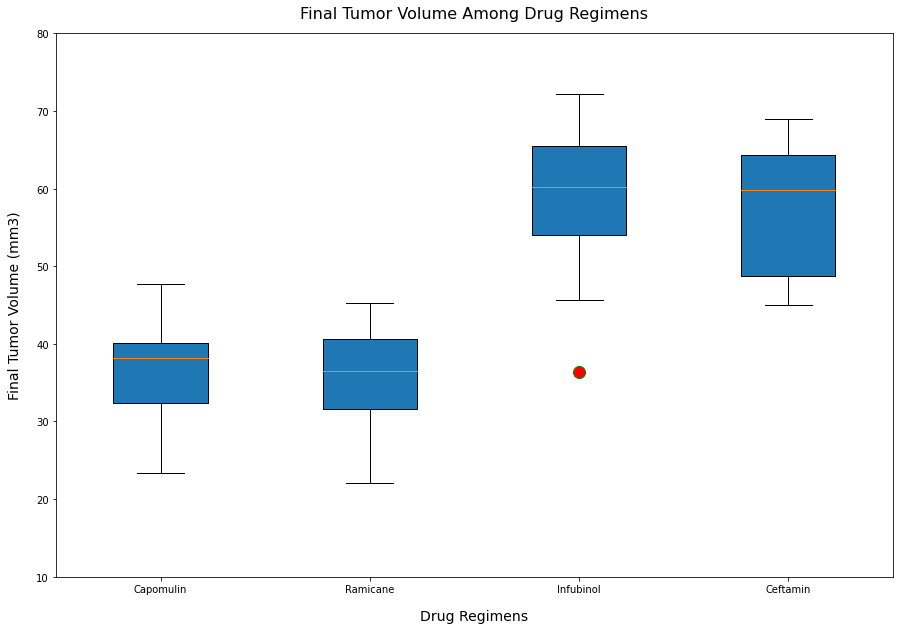

In [87]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#"tumor_sizes" is a list of the lists for each drug's tumor vol data
tumor_sizes = [cap_tumor, ram_tumor, inf_tumor, ceft_tumor]

#create labels to correspond with data inputted above
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#flierprops variable
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')

#create box plot
fig1, ax1 = plt.subplots(figsize = (15,10))
ax1.set_title("Final Tumor Volume Among Drug Regimens", fontsize= 16, pad= 15)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontsize= 14,labelpad= 15)
ax1.set_xlabel("Drug Regimens", fontsize= 14,labelpad= 15)

#patch_artist = True --- changes the color of the boxes
ax1.boxplot(tumor_sizes, labels=labels, patch_artist = True, flierprops = flierprops )
plt.ylim(10, 80)





## Line and Scatter Plots

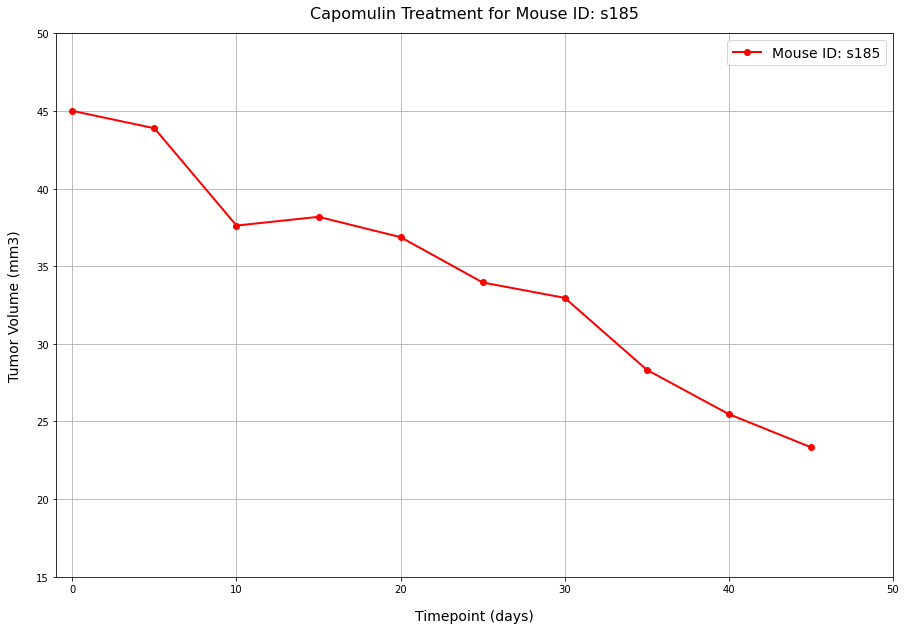

In [88]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
clean_df.head(10)

#bring in df from Capomulin example above - "capomulin" is essentially a df with all data from cap
capomulin = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]

#use .loc to find mouse with specific id --chose first ID I saw
random_mouse= capomulin.loc[capomulin["Mouse ID"]=="s185", :]

#create x-axis(time_point) and y-axis (tumor_vol)
time_point = random_mouse["Timepoint"]
tumor_vol = random_mouse["Tumor Volume (mm3)"]

#change size of line graph
fig1, ax1 = plt.subplots(figsize=(15, 10))

#plot line graph
plt.plot(time_point, tumor_vol, color="red", marker = "o", label ="Mouse ID: s185", linewidth=2)

#formatting
plt.xlabel("Timepoint (days)", fontsize = 14, labelpad = 15)
plt.ylabel("Tumor Volume (mm3)", fontsize = 14, labelpad = 15)
plt.title("Capomulin Treatment for Mouse ID: s185", fontsize=16, pad= 15)
plt.legend(fontsize = 14)
plt.ylim(15, 50)
plt.xlim(-1, 50)
plt.grid()





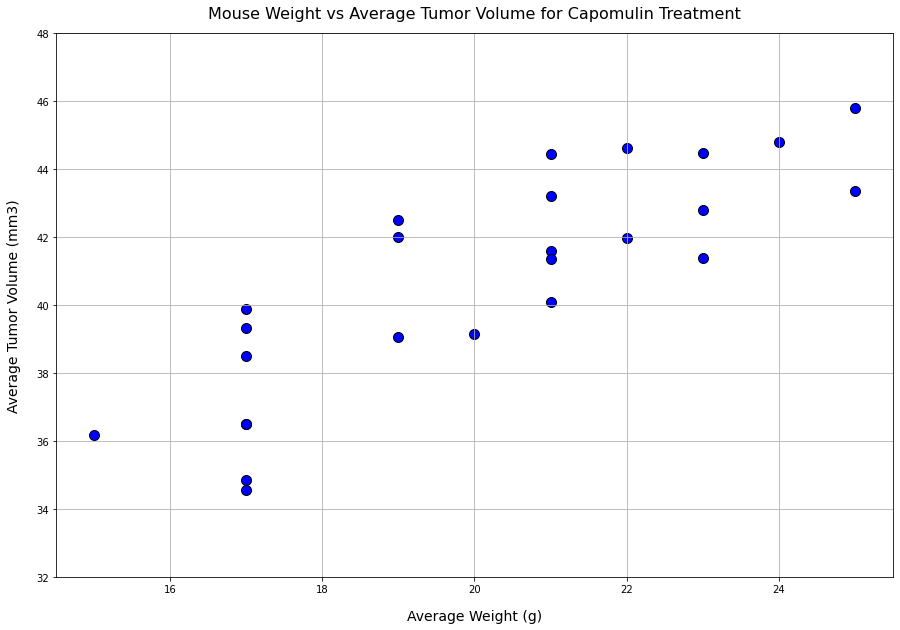

In [89]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#bring in df from Capomulin example above - "capomulin" is essentially a df with all data from cap
capomulin = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]

#group the cap_df by ID and find mean of the each IDs tumor volume to find the avg tumor volume
avg_tumor_vol = capomulin.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]

#do the same as above to find the average weight in gs of the mice
mouse_weight = capomulin.groupby("Mouse ID").mean()["Weight (g)"]

#create scatter plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(mouse_weight,avg_tumor_vol, marker = "o", facecolors="blue", edgecolors="black", s=100)
plt.ylabel("Average Tumor Volume (mm3)", labelpad=15, fontsize=14)
plt.xlabel("Average Weight (g)", labelpad=15, fontsize=14)
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Treatment", pad=15, fontsize=16)
plt.ylim(32, 48)
plt.grid()



## Correlation and Regression

slope:0.95
intercept:21.55
rvalue (Correlation coefficient):0.84
stderr:0.13
y=0.95x + 21.55


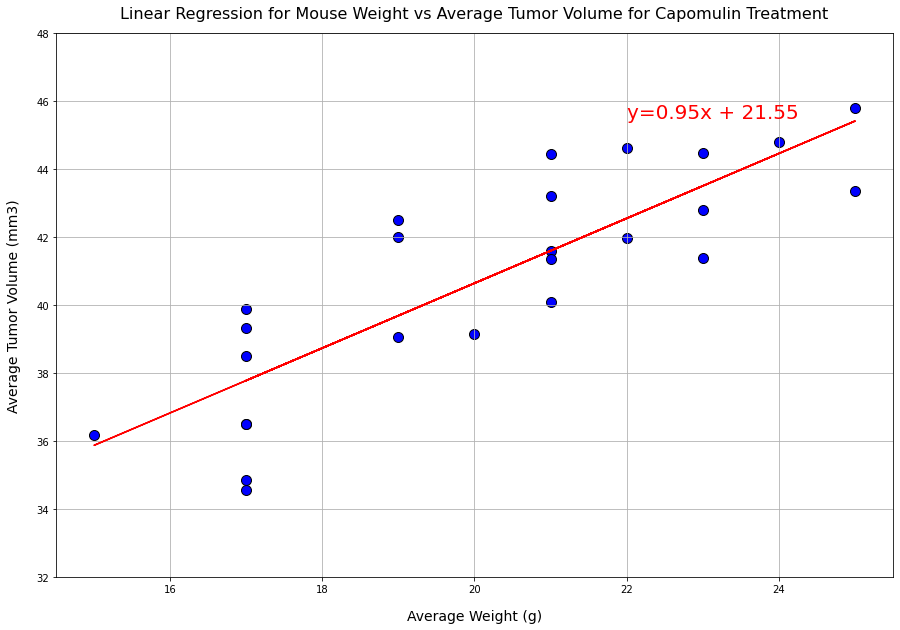

In [90]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#C&P from above to see x and y values 
avg_tumor_vol = capomulin.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]

mouse_weight = capomulin.groupby("Mouse ID").mean()["Weight (g)"]

#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
print(f"rvalue (Correlation coefficient):{round(rvalue, 2)}")
#print(f"pvalue (Correlation coefficient):{pvalue}")
print(f"stderr:{round(stderr, 2)}")


#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out scatter for reference and to make sure everything looks good
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(mouse_weight, avg_tumor_vol, marker = "o", facecolors="blue", edgecolors="black", s=100)
plt.ylabel("Average Tumor Volume (mm3)", labelpad=15, fontsize=14)
plt.xlabel("Average Weight (g)", labelpad=15, fontsize=14)
plt.title("Linear Regression for Mouse Weight vs Average Tumor Volume for Capomulin Treatment", pad=15, fontsize=16)
plt.ylim(32, 48)
plt.grid()

#plot out line and then solve for y=mx +b
plt.plot(mouse_weight, regress_values, "r-")
plt.annotate(line_eq,(22, 45.5), fontsize =20, color = "red")
plt.show()
